In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

In [139]:
df= pd.read_csv('kpopgroups.csv')

In [53]:
df

,Name,Short,Korean Name,Gender,Debut,Company,Members,Orig Memb,Fanclub Name,Active
0,(G)I-DLE,NaN,(여자)아이들,Female,2/05/2018,Cube,5,6,NaN,Yes
1,100%,NaN,백퍼센트,Male,18/09/2012,TOP Media,4,7,Perfection,Yes
2,14U,NaN,원포유,Male,17/04/2017,BG,14,14,NaN,No
3,15&,NaN,피프틴앤드,Female,5/10/2012,JYP,2,2,NaN,No
4,1TEAM,NaN,원팀,Male,27/03/2019,LiveWorks,5,5,NaN,No
...,...,...,...,...,...,...,...,...,...,...
421,XODIAC,NaN,소디엑,Male,25/03/2023,One Cool Jacso,9,9,NaN,Yes
422,XUM,NaN,썸,Female,22/09/2020,A100,3,3,AWEXUM,No
423,Yellow Bee,NaN,옐로비,Female,23/11/2017,Addiction,5,5,NaN,No
424,YOUNITE,NaN,유나이트,Male,20/04/2022,Brand New,9,9,YOUNIZ,Yes


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426 entries, 0 to 425
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          426 non-null    object
 1   Short         53 non-null     object
 2   Korean Name   426 non-null    object
 3   Gender        426 non-null    object
 4   Debut         424 non-null    object
 5   Company       425 non-null    object
 6   Members       426 non-null    int64 
 7   Orig Memb     426 non-null    int64 
 8   Fanclub Name  141 non-null    object
 9   Active        426 non-null    object
dtypes: int64(2), object(8)
memory usage: 33.4+ KB


In [55]:
df.isnull().sum()

Name              0
Short           373
Korean Name       0
Gender            0
Debut             2
Company           1
Members           0
Orig Memb         0
Fanclub Name    285
Active            0
dtype: int64

In [56]:
del df['Short']

In [60]:
df[df['Debut'].isnull()]

,Name,Korean Name,Gender,Debut,Company,Members,Orig Memb,Fanclub Name,Active
25,ADYA,에이디야,Female,NaN,Starting House,5,5,NaN,Yes
53,BABYMONSTER,베이비몬스터,Female,NaN,YG,7,7,NaN,Pre-Debut


In [63]:
df = df.dropna(subset=['Debut'])

In [70]:
df['Debut_year'] = df.Debut.apply(lambda x : x.split('/')[-1])

C:\Users\user\AppData\Local\Temp\ipykernel_7192\2062365002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Debut_year'] = df.Debut.apply(lambda x : x.split('/')[-1])


In [74]:
df.groupby('Debut_year')['Name'].count()

Debut_year
1995     1
1996     1
1997     3
1998     1
1999     2
2001     1
2002     1
2003     1
2004     2
2005     4
2006     2
2007     7
2008     5
2009     9
2010    12
2011    17
2012    26
2013    12
2014    28
2015    24
2016    29
2017    49
2018    35
2019    42
2020    42
2021    25
2022    30
2023    13
Name: Name, dtype: int64

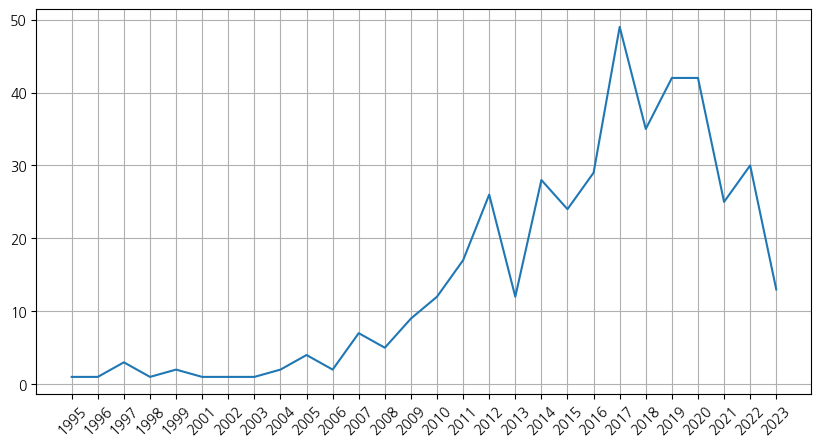

In [92]:
plt.figure(figsize=(10,5))
plt.grid(True)
plt.plot(df.groupby('Debut_year')['Name'].count().index, df.groupby('Debut_year')['Name'].count())
plt.xticks(rotation=45)
plt.show()

※ 연간 데뷔 케이팝 그룹은 2017년 정점을 찍고 최근에는 하향세로 접어들었다.

In [93]:
df

,Name,Korean Name,Gender,Debut,Company,Members,Orig Memb,Fanclub Name,Active,Debut_year
0,(G)I-DLE,(여자)아이들,Female,2/05/2018,Cube,5,6,NaN,Yes,2018
1,100%,백퍼센트,Male,18/09/2012,TOP Media,4,7,Perfection,Yes,2012
2,14U,원포유,Male,17/04/2017,BG,14,14,NaN,No,2017
3,15&,피프틴앤드,Female,5/10/2012,JYP,2,2,NaN,No,2012
4,1TEAM,원팀,Male,27/03/2019,LiveWorks,5,5,NaN,No,2019
...,...,...,...,...,...,...,...,...,...,...
421,XODIAC,소디엑,Male,25/03/2023,One Cool Jacso,9,9,NaN,Yes,2023
422,XUM,썸,Female,22/09/2020,A100,3,3,AWEXUM,No,2020
423,Yellow Bee,옐로비,Female,23/11/2017,Addiction,5,5,NaN,No,2017
424,YOUNITE,유나이트,Male,20/04/2022,Brand New,9,9,YOUNIZ,Yes,2022


In [94]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [111]:
df_female = df[df.Gender == 'Female']
df_male = df[df.Gender == 'Male']

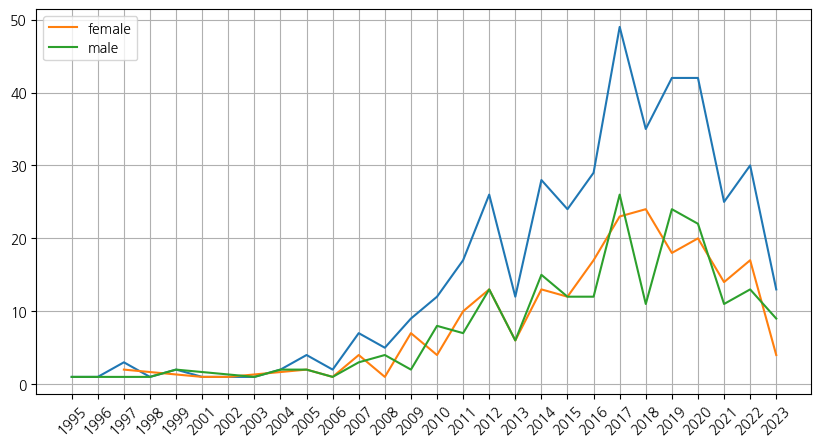

In [132]:
plt.figure(figsize=(10,5))
plt.grid(True)
plt.xticks(rotation=45)

plt.plot(df.groupby('Debut_year')['Name'].count().index, df.groupby('Debut_year')['Name'].count())
plt.plot(df_female.groupby('Debut_year')['Name'].count().index, df_female.groupby('Debut_year')['Name'].count(), label='female')
plt.plot(df_male.groupby('Debut_year')['Name'].count().index, df_male.groupby('Debut_year')['Name'].count(), label='male')
plt.legend(loc='upper left')
plt.show()

In [ ]:
※ 남성그룹과 여성그룹의 숫자는 비슷하게 데뷔하고 있다.

In [133]:
df

,Name,Korean Name,Gender,Debut,Company,Members,Orig Memb,Fanclub Name,Active,Debut_year
0,(G)I-DLE,(여자)아이들,Female,2/05/2018,Cube,5,6,NaN,Yes,2018
1,100%,백퍼센트,Male,18/09/2012,TOP Media,4,7,Perfection,Yes,2012
2,14U,원포유,Male,17/04/2017,BG,14,14,NaN,No,2017
3,15&,피프틴앤드,Female,5/10/2012,JYP,2,2,NaN,No,2012
4,1TEAM,원팀,Male,27/03/2019,LiveWorks,5,5,NaN,No,2019
...,...,...,...,...,...,...,...,...,...,...
421,XODIAC,소디엑,Male,25/03/2023,One Cool Jacso,9,9,NaN,Yes,2023
422,XUM,썸,Female,22/09/2020,A100,3,3,AWEXUM,No,2020
423,Yellow Bee,옐로비,Female,23/11/2017,Addiction,5,5,NaN,No,2017
424,YOUNITE,유나이트,Male,20/04/2022,Brand New,9,9,YOUNIZ,Yes,2022


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


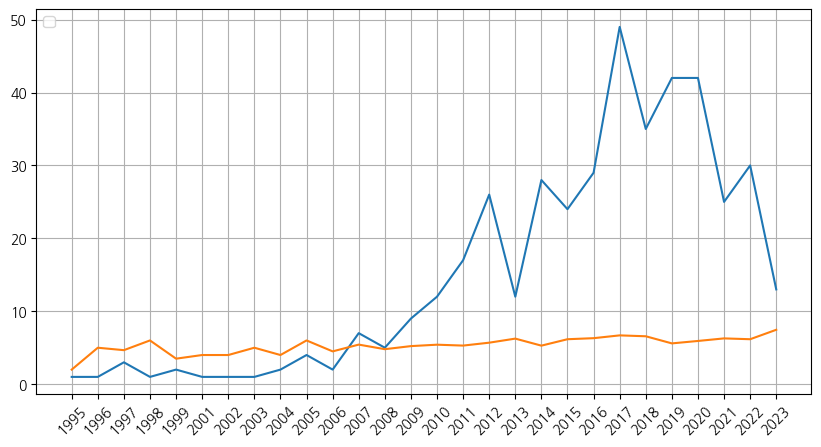

In [137]:
plt.figure(figsize=(10,5))
plt.grid(True)
plt.xticks(rotation=45)

plt.plot(df.groupby('Debut_year')['Name'].count().index, df.groupby('Debut_year')['Name'].count())
plt.plot(df.groupby('Debut_year')['Orig Memb'].mean().index, df.groupby('Debut_year')['Orig Memb'].mean())

plt.legend(loc='upper left')
plt.show()

※ 그룹당 데뷔인원은 과거보다는 늘었지만 최근에는 해가 거듭해가도 큰 차이를 보이고 있지 않다.